**Step 1: Install and Import Libraries**

We start by installing the **yfinance** library to fetch stock data and importing necessary libraries for data **manipulation**, **visualization**, and building the **LSTM model**.



In [69]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [70]:
import yfinance as yf

**Step 2: Fetch Historical Stock Data**

We will download the historical stock data for Google over the last 20 years. The start and end dates are defined to specify the time range for the data.

In [71]:
from datetime import datetime
end = datetime.now()
start =   datetime(end.year-20,  end.month, end.day)

In [72]:
pip install --upgrade yfinance

In [73]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [74]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-02-14,4.789524,4.791758,4.491963,4.537875,1548269624
2005-02-15,4.845115,4.959524,4.791758,4.804662,1035177611
2005-02-16,4.924035,4.946866,4.822035,4.831962,663770685
2005-02-17,4.911378,4.957290,4.884327,4.909640,418137429
2005-02-18,4.912619,4.934706,4.880604,4.926517,340708289


**Step 3: Explore the Data**

We will explore the downloaded data to understand its structure, check for missing values, and get descriptive statistics.

In [75]:
google_data.shape

(5031, 5)

In [76]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03
mean,49.601209,50.103183,49.084352,49.578437,1.063245e+08
std,47.582214,48.079548,47.081933,47.547866,1.384799e+08
min,4.342810,4.427437,4.282752,4.350503,1.584340e+05
25%,13.417194,13.542770,13.280822,13.417318,2.634000e+07
50%,28.374367,28.652102,28.121471,28.407159,4.950800e+07
75%,66.758877,67.339790,65.994132,66.584258,1.297264e+08
max,207.710007,208.699997,204.259995,204.500000,1.650833e+09


In [77]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5031 entries, 2005-02-14 to 2025-02-11
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5031 non-null   float64
 1   (High, GOOG)    5031 non-null   float64
 2   (Low, GOOG)     5031 non-null   float64
 3   (Open, GOOG)    5031 non-null   float64
 4   (Volume, GOOG)  5031 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.8 KB


In [78]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

**Step 4: Visualize the Closing Prices**

We will visualize the closing prices of Google stock over the years to observe trends.

In [79]:
pip install "numpy<2"



  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [80]:
!pip uninstall matplotlib -y
!pip install matplotlib


Found existing installation: matplotlib 3.10.0
Uninstalling matplotlib-3.10.0:


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Darshan\AppData\Local\Programs\Python\Python310\lib\shutil.py", line 816, in move
    os.rename(src, real_dst)
PermissionError: [WinError 5] Access is denied: 'c:\\users\\darshan\\appdata\\local\\programs\\python\\python310\\lib\\site-packages\\matplotlib\\' -> 'C:\\Users\\Darshan\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~~tplotlib'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Darshan\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "C:\Users\Darshan\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
  File "C:\Users\Darshan\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_internal\commands\uninstall.p

  Using cached matplotlib-3.10.0-cp310-cp310-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.10.0-cp310-cp310-win_amd64.whl (8.0 MB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Darshan\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Google Stock Closing Price')

<Figure size 1500x500 with 0 Axes>

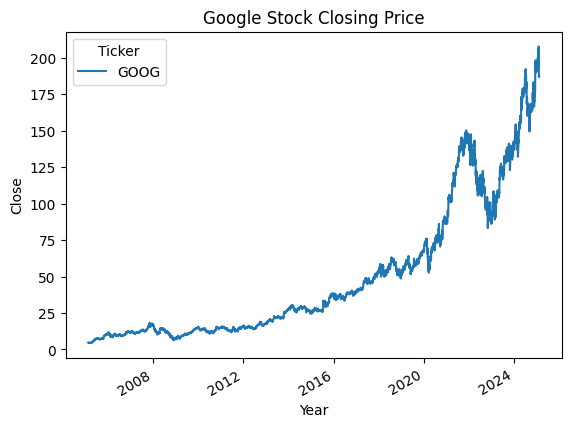

In [82]:
plt.figure(figsize=(15,5))
google_data['Close'].plot()
plt.xlabel("Year")
plt.ylabel("Close")
plt.title("Google Stock Closing Price")

**Step 5: Plot All Columns**

We will create a function to plot different columns of the dataset for better visualization.

In [83]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.xlabel("Year")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google Stock Data")

In [84]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

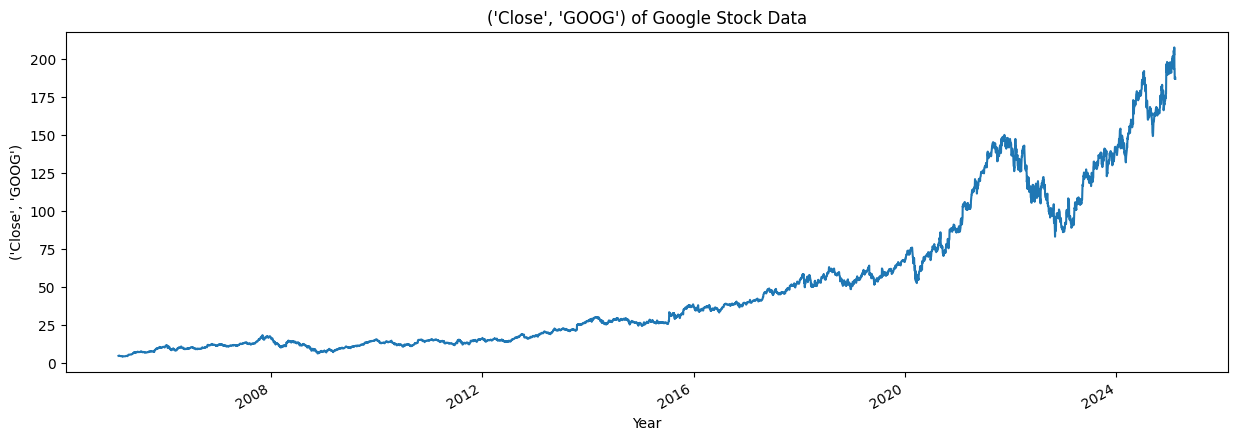

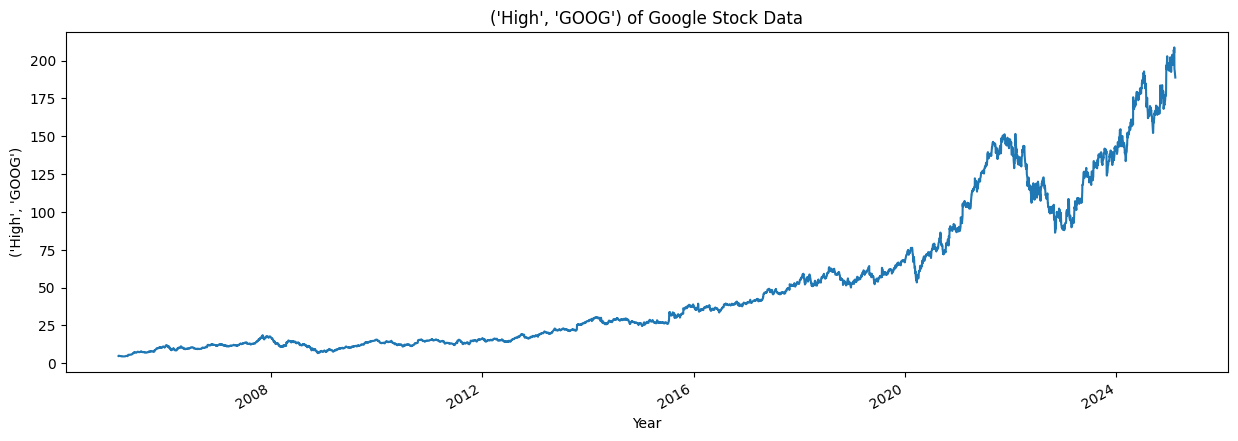

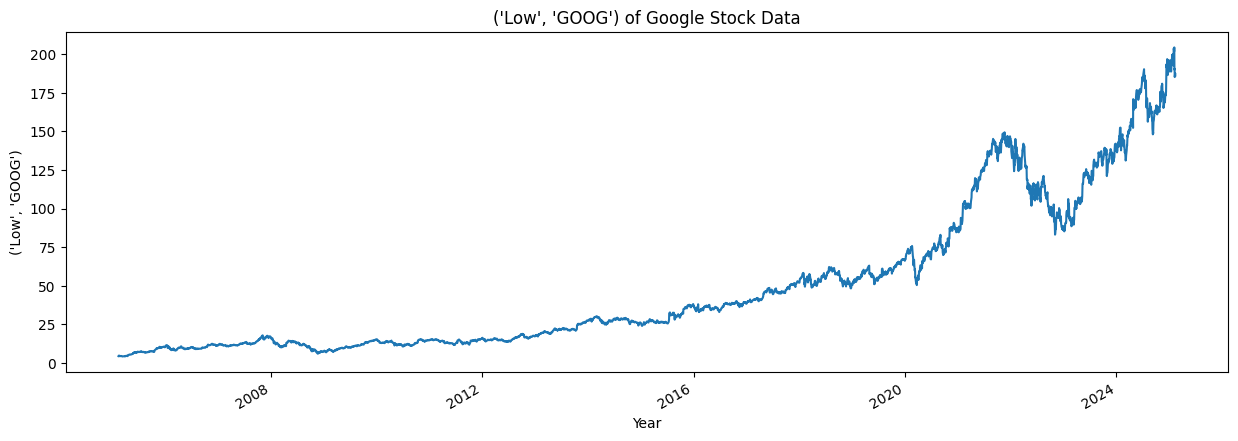

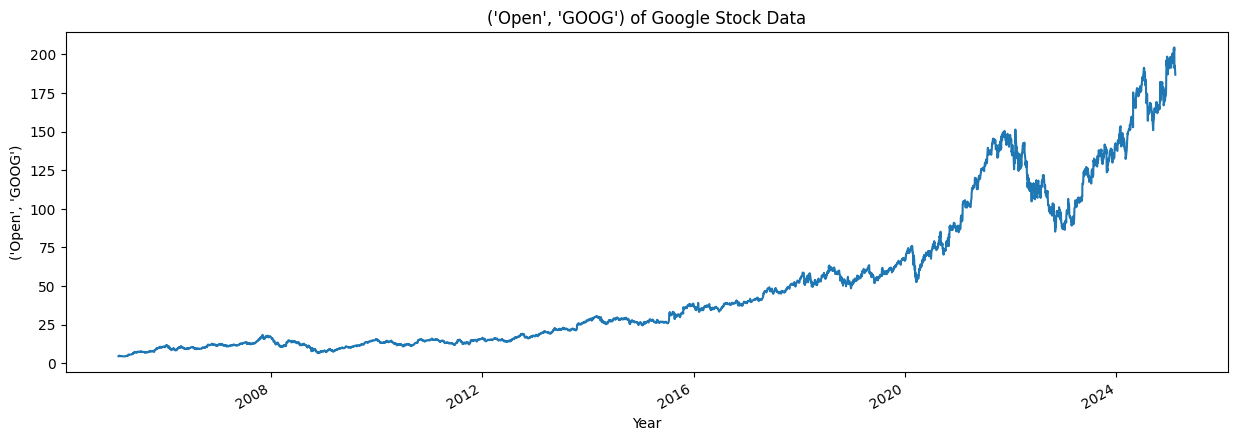

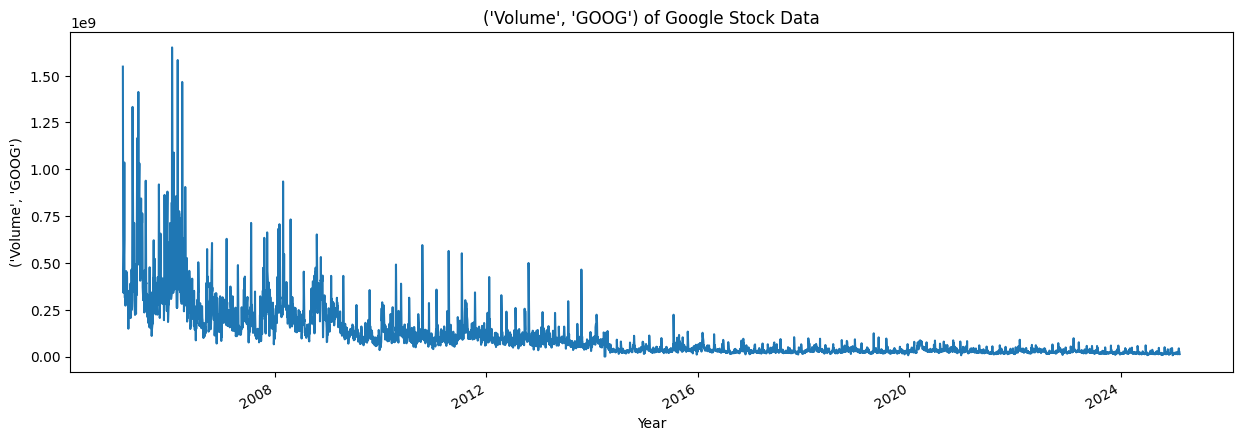

In [85]:
for column in google_data.columns:
    plot_graph((15,5), google_data[column], column)

**Step 6: Count Entries by Year**

We will count the number of entries for each year in the dataset to understand the data distribution over the years.

In [86]:
for i in range(2005,2025):
    print(i,list(google_data.index.year).count(i))

2005 223
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


**Step 7: Calculate Moving Averages**

We will calculate the 250-day and 100-day moving averages of the closing prices to smooth out short-term fluctuations.

In [87]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [88]:
google_data['MA_for_250_days'][0:250].tail()

Date
2006-02-03         NaN
2006-02-06         NaN
2006-02-07         NaN
2006-02-08         NaN
2006-02-09    7.538371
Name: MA_for_250_days, dtype: float64

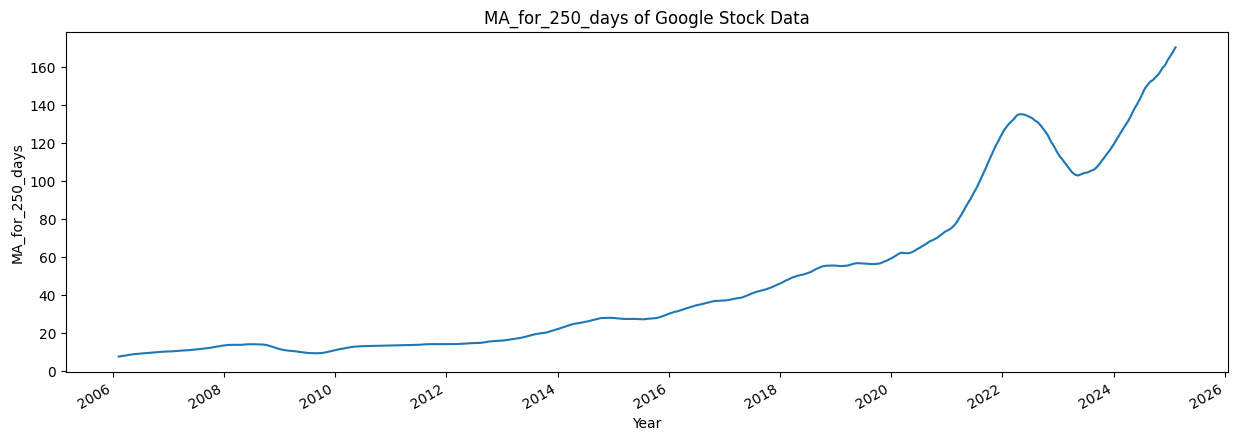

In [89]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

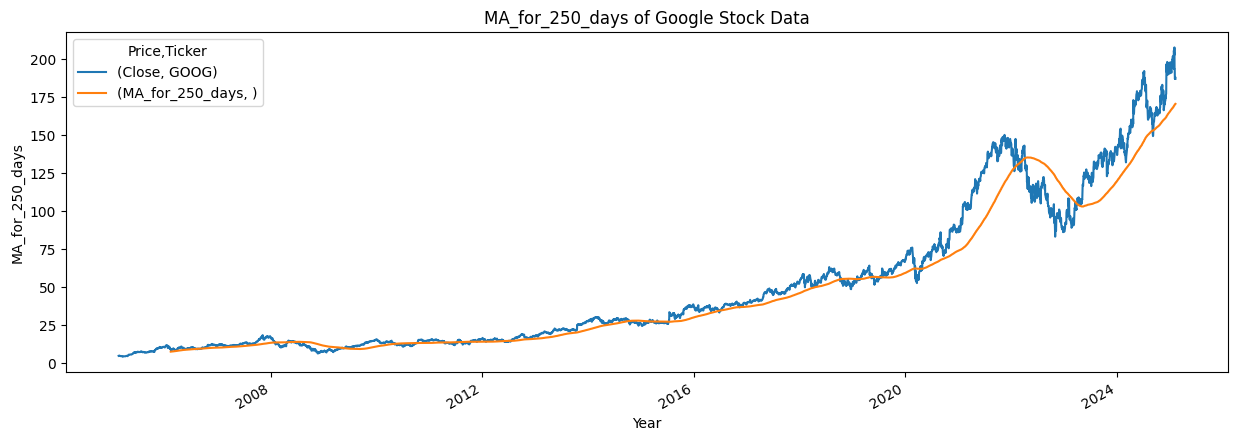

In [90]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

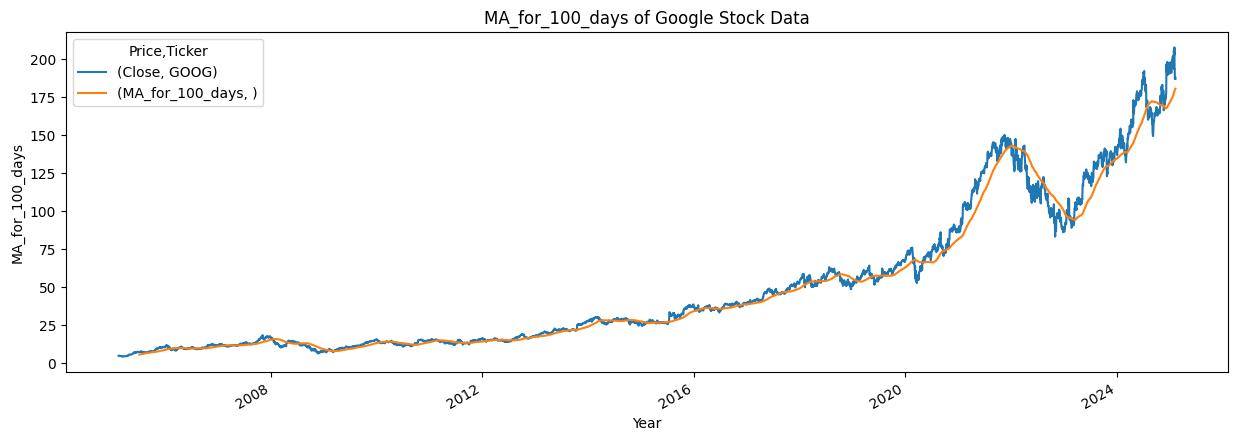

In [91]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

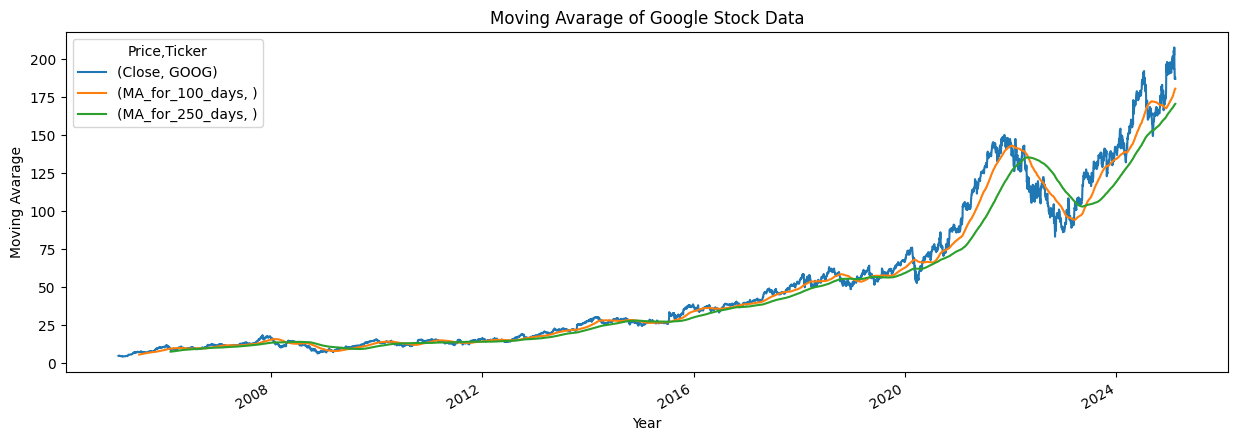

In [92]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'Moving Avarage')

**Step 8: Calculate Percentage Change**

We will calculate the percentage change in closing prices to analyze the stock's performance over time.

In [93]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-02-14,4.789524,NaN
2005-02-15,4.845115,0.011607
2005-02-16,4.924035,0.016289
2005-02-17,4.911378,-0.002570
2005-02-18,4.912619,0.000253


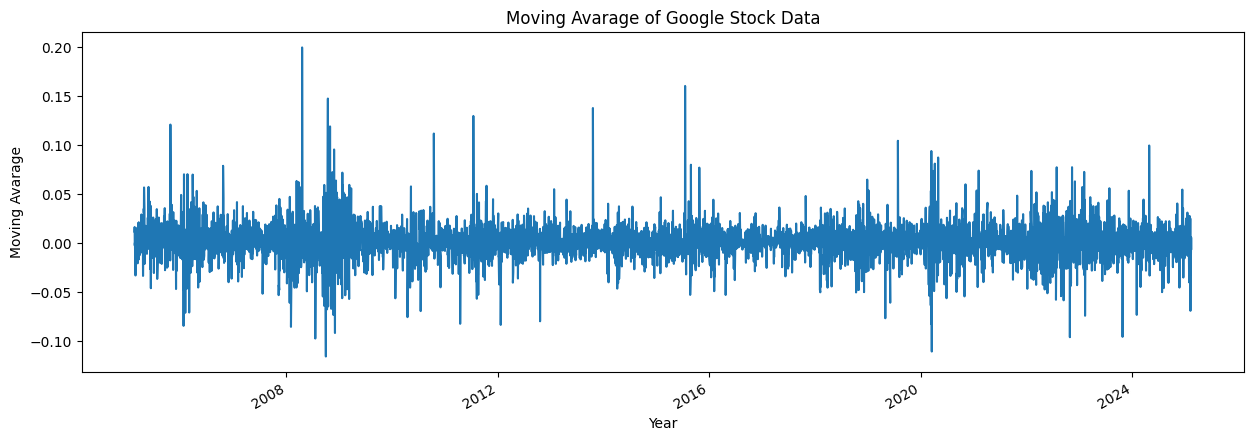

In [94]:
plot_graph((15,5), google_data['percentage_change_cp'], 'Moving Avarage')

**Step 9: Scale the Data**

We will scale the closing prices to a range of 0 to 1 to prepare the data for the LSTM model.

In [95]:
close_price = google_data[['Close']]

In [96]:
max(close_price.values),min(close_price.values)

(array([207.71000671]), array([4.34281015]))

In [97]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price)
scaled_data

array([[0.00219659],
       [0.00246994],
       [0.002858  ],
       ...,
       [0.89885287],
       [0.90406511],
       [0.89850871]])

In [99]:
len(scaled_data)

5031

**Step 10: Prepare Data for LSTM Model**

We will create sequences of data for training the LSTM model.

In [100]:
import numpy as np

x_data = []
y_data = []

for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

In [101]:
x_data[0], y_data[0]

(array([[2.19658791e-03],
        [2.46993892e-03],
        [2.85800489e-03],
        [2.79576924e-03],
        [2.80187018e-03],
        [1.99889366e-03],
        [2.31374136e-03],
        [1.69625252e-03],
        [1.32771565e-03],
        [1.58642160e-03],
        [1.35090014e-03],
        [1.24351241e-03],
        [1.46682965e-03],
        [1.33137574e-03],
        [1.68648680e-03],
        [1.24594857e-03],
        [7.76124897e-04],
        [6.08940020e-04],
        [3.42909190e-04],
        [0.00000000e+00],
        [4.41757487e-04],
        [7.44375175e-05],
        [5.24736784e-04],
        [6.16260205e-04],
        [7.18773284e-04],
        [4.40538237e-04],
        [4.86907228e-04],
        [5.19857442e-04],
        [7.84666677e-04],
        [5.58906247e-04],
        [6.66293978e-04],
        [6.73616508e-04],
        [6.16260205e-04],
        [1.25693353e-03],
        [1.65720372e-03],
        [1.73652292e-03],
        [2.29054983e-03],
        [2.08187530e-03],
        [2.2

In [102]:
int(len(x_data)*0.7)

3451

In [103]:
len(scaled_data)-100-int(len(x_data)*0.7)

1480

**Step 11: Split the Data**

We will split the data into training and testing sets.

In [104]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [105]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3451, 100, 1)
(3451, 1)
(1480, 100, 1)
(1480, 1)


**Step 12: Build and Train the LSTM Model**

We will build the LSTM model and train it on the training data.

In [106]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [107]:
pip uninstall numpy tensorflow keras -y


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --no-cache-dir numpy tensorflow keras

In [109]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping  # Import EarlyStopping

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with early stopping
model.fit(x_train, y_train, batch_size=1, epochs=20, validation_split=0.2, callbacks=[early_stopping])

# After training, you can check the model summary and make predictions
model.summary()
predictions = model.predict(x_test)

c:\Users\Darshan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2760/2760 ━━━━━━━━━━━━━━━━━━━━ 108s 37ms/step - loss: 1.5340e-04 - val_loss: 4.6998e-05
Epoch 2/20
2760/2760 ━━━━━━━━━━━━━━━━━━━━ 96s 35ms/step - loss: 2.2984e-05 - val_loss: 3.5450e-05
Epoch 3/20
2760/2760 ━━━━━━━━━━━━━━━━━━━━ 94s 34ms/step - loss: 2.4140e-05 - val_loss: 2.5375e-05
Epoch 4/20
2760/2760 ━━━━━━━━━━━━━━━━━━━━ 102s 37ms/step - loss: 1.5740e-05 - val_loss: 8.2621e-05
Epoch 5/20
2760/2760 ━━━━━━━━━━━━━━━━━━━━ 116s 42ms/step - loss: 1.3524e-05 - val_loss: 1.8886e-05
Epoch 6/20
2760/2760 ━━━━━━━━━━━━━━━━━━━━ 101s 37ms/step - loss: 9.1515e-06 - val_loss: 4.1672e-05
Epoch 7/20
2760/2760 ━━━━━━━━━━━━━━━━━━━━ 104s 38ms/step - loss: 1.0688e-05 - val_loss: 1.2751e-05
Epoch 8/20
2760/2760 ━━━━━━━━━━━━━━━━━━━━ 96s 35ms/step - loss: 1.1458e-05 - val_loss: 5.3156e-05
Epoch 9/20
2760/2760 ━━━━━━━━━━━━━━━━━━━━ 103s 37ms/step - loss: 9.9310e-06 - val_loss: 5.5344e-05
Epoch 10/20
2760/2760 ━━━━━━━━━━━━━━━━━━━━ 103s 37ms/step - loss: 9.6130e-06 - val_loss: 1.4111e-05
Epoch 11/20


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


In [110]:
predictions

array([[0.2689735 ],
       [0.2672892 ],
       [0.26475096],
       ...,
       [0.8726827 ],
       [0.84659487],
       [0.85519004]], dtype=float32)

In [111]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 59.043198],
       [ 58.700665],
       [ 58.18447 ],
       ...,
       [181.81786 ],
       [176.51244 ],
       [178.26042 ]], dtype=float32)

In [112]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 59.01893997],
       [ 58.44101715],
       [ 58.2153244 ],
       ...,
       [187.13999939],
       [188.19999695],
       [187.07000732]])

In [113]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [114]:
rmse

4.47661454901118

In [115]:
import pandas as pd
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-03-26,59.018940,59.043198
2019-03-27,58.441017,58.700665
2019-03-28,58.215324,58.184471
2019-03-29,58.455463,58.036179
2019-04-01,59.507683,58.329445


<Figure size 640x480 with 0 Axes>

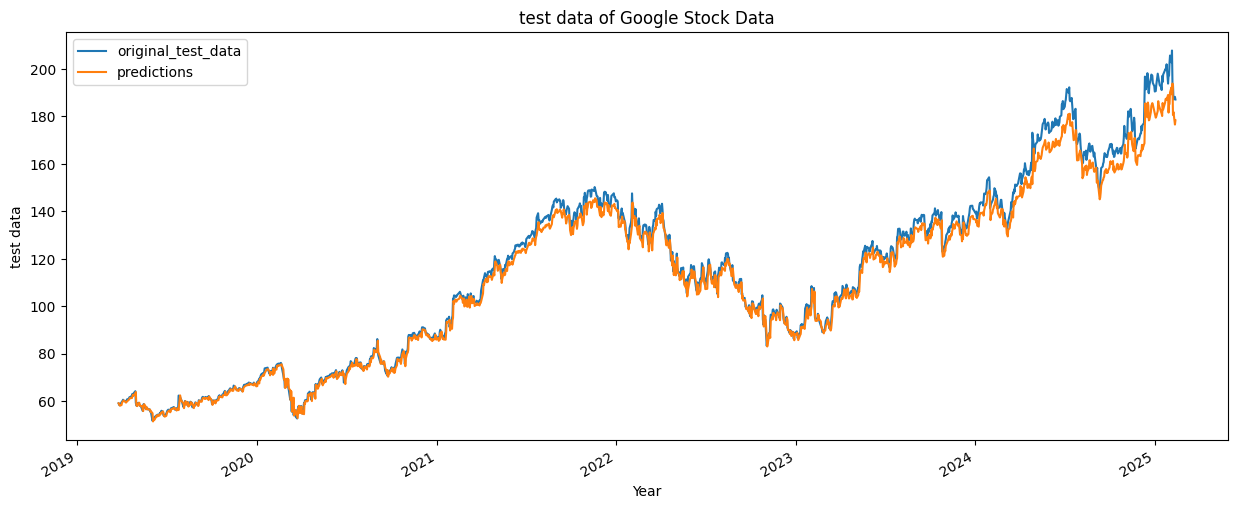

In [116]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

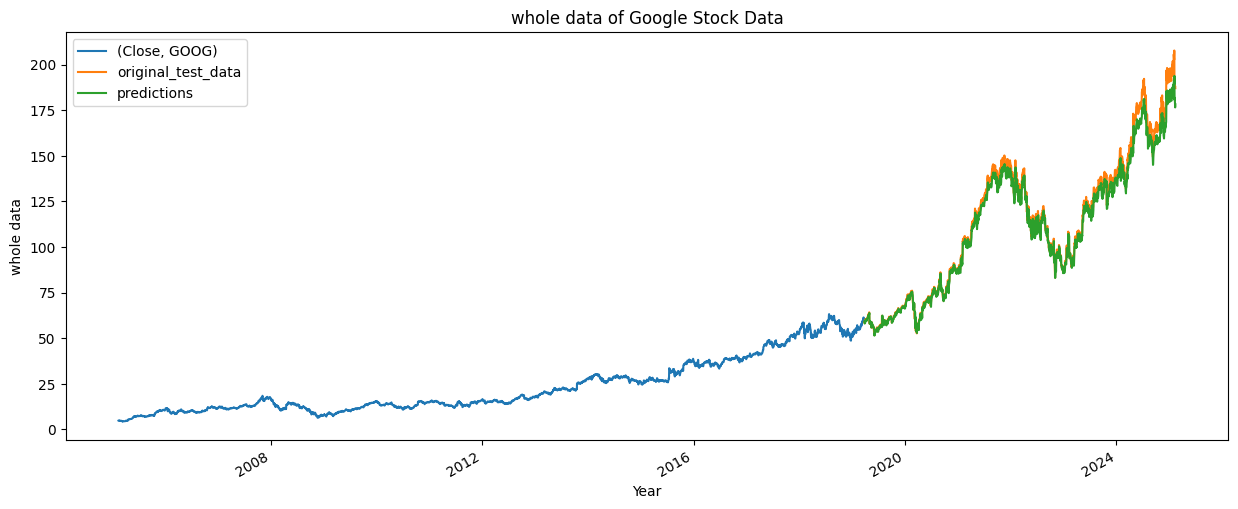

In [117]:
plot_graph((15,6), pd.concat([close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [119]:
model.save("Latest_stock_price_model.keras")